**Tugas Praktikum**

**Tugas**

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

**Teknik K-Means pada data Mail_Customers**

In [1]:
# Persiapan data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from sklearn.cluster import KMeans

In [43]:
# Load Data
data = pd.read_csv('data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
# Menetukan fitur apa yang tepat untuk melakukan clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

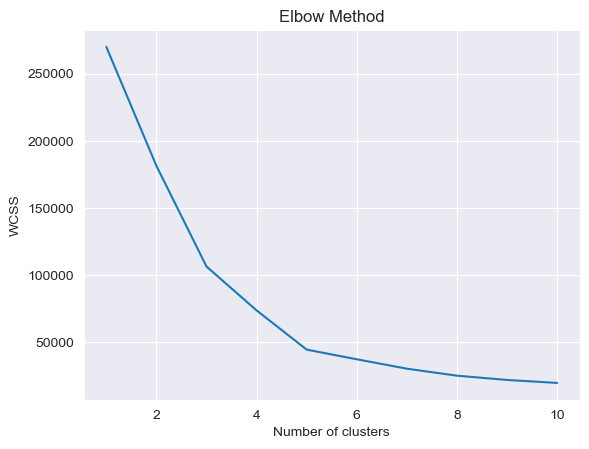

In [45]:
# Pemilihan Jumlah Cluster yang Optimal
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Membuat plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
# Pelatihan Model K-Means
n_clusters = 5  # Sesuaikan dengan jumlah cluster yang Anda tentukan
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

print(kmeans)

KMeans(n_clusters=5, n_init=10, random_state=0)


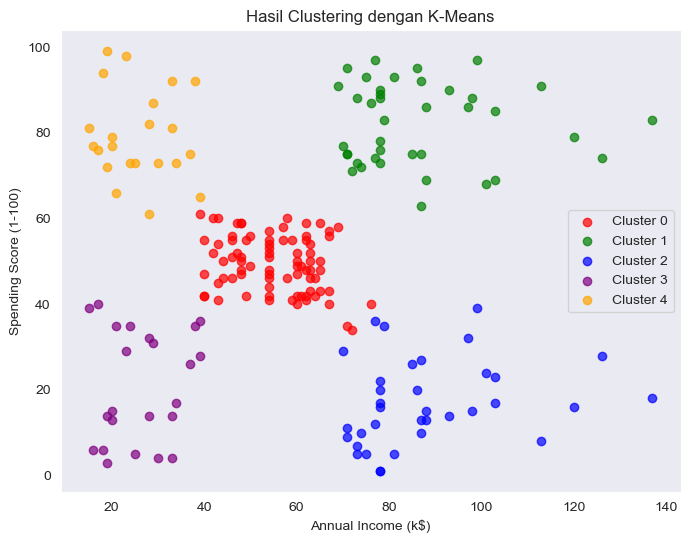

In [47]:
# Hasil Clustering
y_kmeans = kmeans.predict(X)
data['Cluster'] = y_kmeans

# Menampilkan hasil clustering

# Membuat plot scatter untuk setiap cluster
plt.figure(figsize=(8, 6))

# Warna yang berbeda untuk setiap cluster
colors = ['red', 'green', 'blue', 'purple', 'orange']

for cluster_id, color in enumerate(colors):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                c=color, label=f'Cluster {cluster_id}', alpha=0.7)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil Clustering dengan K-Means')
plt.legend()
plt.grid()
plt.show()

**Metode Self-Organizing Map (SOM) untuk segmentasi citra China.**

In [2]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [3]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [4]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [5]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [6]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

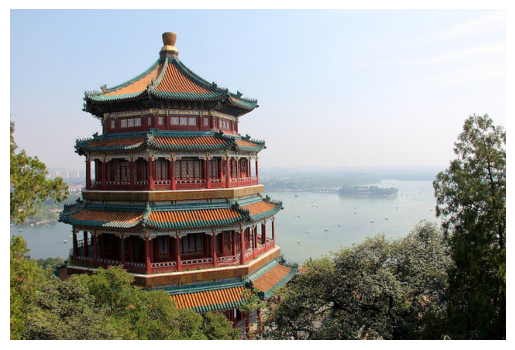

In [31]:
from sklearn.datasets import load_sample_image

# Langkah 1: Memuat Citra
image = load_sample_image("china.jpg")
image = np.array(image, dtype=np.float64) / 255

# Menampilkan citra
plt.imshow(image)
plt.axis('off')
plt.show()

In [32]:
# Latih SOM
num_epochs = 50
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

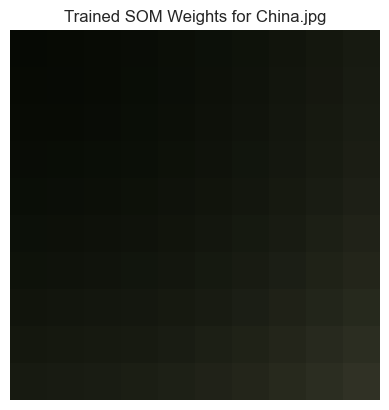

In [37]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for China.jpg')
plt.axis('off')
plt.show()